# EDA

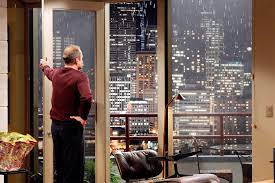

In [70]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px




from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Data Import and Clearning

In [2]:
# print out the definition of each column names
with open('column_names.md') as column_description:
    for line in column_description:
        if not '#' in line:
            print(line.replace('- **', '').replace('** -',' = '))

# read in the data and show first few rows
df = pd.read_csv("data/King_County_House_prices_dataset.csv")
df.head(10)



id =  unique identified for a house

dateDate =  house was sold

pricePrice =  is prediction target

sqft_livingsquare =  footage of the home

sqft_lotsquare =  footage of the lot

floorsTotal =  floors (levels) in house

waterfront =  House which has a view to a waterfront

view =  Has been viewed

condition =  How good the condition is ( Overall )

grade =  overall grade given to the housing unit, based on King County grading system

sqft_above =  square footage of house apart from basement

sqft_basement =  square footage of the basement

yr_built =  Built Year

yr_renovated =  Year when house was renovated

zipcode =  zip

lat =  Latitude coordinate

long =  Longitude coordinate

sqft_living15 =  The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 =  The square footage of the land lots of the nearest 15 neighbors



id        date       price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.000         3      1.000         1180   
1  6414100192   12/9/2014  538000.000         3      2.250         2570   
2  5631500400   2/25/2015  180000.000         2      1.000          770   
3  2487200875   12/9/2014  604000.000         4      3.000         1960   
4  1954400510   2/18/2015  510000.000         3      2.000         1680   
5  7237550310   5/12/2014 1230000.000         4      4.500         5420   
6  1321400060   6/27/2014  257500.000         3      2.250         1715   
7  2008000270   1/15/2015  291850.000         3      1.500         1060   
8  2414600126   4/15/2015  229500.000         3      1.000         1780   
9  3793500160   3/12/2015  323000.000         3      2.500         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650   1.000         NaN 0.000  ...      7        1180            0.0   
1      7242   2.000       0.000 0.000  ...      7        2170          400.0   
2     10000   1.000       0.000 0.000  ...      6         770            0.0   
3      5000   1.000       0.000 0.000  ...      7        1050          910.0   
4      8080   1.000       0.000 0.000  ...      8        1680            0.0   
5    101930   1.000       0.000 0.000  ...     11        3890         1530.0   
6      6819   2.000       0.000 0.000  ...      7        1715              ?   
7      9711   1.000       0.000   NaN  ...      7        1060            0.0   
8      7470   1.000       0.000 0.000  ...      7        1050          730.0   
9      6560   2.000       0.000 0.000  ...      7        1890            0.0   

  yr_built  yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  
0     1955         0.000    98178 47.511 -122.257           1340        5650  
1     1951      1991.000    98125 47.721 -122.319           1690        7639  
2     1933           NaN    98028 47.738 -122.233           2720        8062  
3     1965         0.000    98136 47.521 -122.393           1360        5000  
4     1987         0.000    98074 47.617 -122.045           1800        7503  
5     2001         0.000    98053 47.656 -122.005           4760      101930  
6     1995         0.000    98003 47.310 -122.327           2238        6819  
7     1963         0.000    98198 47.410 -122.315           1650        9711  
8     1960         0.000    98146 47.512 -122.337           1780        8113  
9     2003         0.000    98038 47.368 -122.031           2390        7570  

[10 rows x 21 columns]

In [3]:
# check if doplicated data
df['id'].duplicated().value_counts()

False    21420
True       177
Name: id, dtype: int64

There are duplicated houses, which might mean the house was sold several times. We will handle this later.

In [4]:
# structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We need to clean the data first:
- date column to datetime
- price from float to integer
- floors from float to integer
- waterfront from float to boolean (there are NaN)
- view from float to integer (there are NaN)
- sqft_basement from object(there are strings) to integer
- yr_renovated from float(there are NaN) to integer



In [5]:
# date to datetime 
df['date'] = pd.to_datetime(df['date'])
# price to int
df['price'] = df['price'].apply( lambda x : int(x))
# floors to int
df['floors'] = df['floors'].apply( lambda x : int(x))
# waterfront to boolean
def waterfront_conversion(x):
    x = str(x)
    try:
        x = int(float(x))
        if x == 1:
            return True
        else:
            return False
    except:
        return False
df['waterfront'] = df['waterfront'].apply(waterfront_conversion)
# view to int
df[pd.isnull(df['view'])] = df[pd.isnull(df['view'])].assign(view = 0)  # set null values to 0
df['view'] = df['view'].apply( lambda x : int(x))
# sqft_basement to int
def size_conversion(x):
    x = str(x)
    try:
        return int(float(x))
    except:
        return 0
df['sqft_basement'] = df['sqft_basement'].apply(size_conversion)
# yr_renovated to int (NaN => 0)
df['yr_renovated'] = df['yr_renovated'].apply(size_conversion)

# check data types for cleanend dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  int64         
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  int64         
 8   waterfront     21597 non-null  bool          
 9   view           21597 non-null  int64         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int64         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

Handling duplicated data.

In [27]:
# create a dataframe contains only duplicates
#   first we create a list for the id of duplicates
df_tmp = df[df['id'].duplicated()]
id_with_duplicate = df_tmp['id']
id_with_duplicate
#   then we get the duplicate dataframe sorted by id and then by date
df_dpc = df[df['id'].isin(id_with_duplicate)].sort_values(by=['id', 'date'])
df_dpc
## furthermore, we add another column for price difference = price_new - price_old
## note that the same id share the same value in this new column
##for id in id_with_duplicate:
    
# revise the original dataframe by removing the older duplicates
df = df.sort_values('date')
df = df[~df['id'].duplicated()]
df

id       date    price  bedrooms  bathrooms  sqft_living  \
7316   2202500290 2014-05-02   435000         4      1.000         1450   
1040   7197300105 2014-05-02   550000         4      2.500         1940   
20543  3438501320 2014-05-02   295000         2      2.500         1630   
9587    472000620 2014-05-02   790000         3      2.500         2600   
9578   1024069009 2014-05-02   675000         5      2.500         2820   
...           ...        ...      ...       ...        ...          ...   
19381  8149600265 2015-05-14   725000         4      1.750         1980   
7217   1786200010 2015-05-14   456500         4      2.500         2580   
5632   7923600250 2015-05-15   450000         5      2.000         1870   
13040  5101400871 2015-05-24   445500         2      1.750         1390   
16580  9106000005 2015-05-27  1310000         4      2.250         3750   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
7316       8800       1       False     0  ...      7        1450   
1040      10500       1       False     0  ...      7        1140   
20543      1368       2       False     0  ...      7        1280   
9587       4750       1       False     0  ...      9        1700   
9578      67518       2       False     0  ...      8        2820   
...         ...     ...         ...   ...  ...    ...         ...   
19381      5850       1       False     1  ...      8        1380   
7217      11780       2       False     0  ...      9        2580   
5632       7344       1       False     0  ...      7        1870   
13040      6670       1       False     0  ...      6         720   
16580      5000       2       False     0  ...      8        2440   

       sqft_basement  yr_built  yr_renovated  zipcode    lat     long  \
7316               0      1954             0    98006 47.575 -122.135   
1040             800      1976             0    98052 47.683 -122.114   
20543            350      2009             0    98106 47.549 -122.363   
9587             900      1951             0    98117 47.683 -122.400   
9578               0      1979             0    98029 47.579 -122.025   
...              ...       ...           ...      ...    ...      ...   
19381            600      1960             0    98116 47.561 -122.391   
7217               0      2003             0    98038 47.366 -122.040   
5632               0      1960             0    98007 47.595 -122.144   
13040            670      1941             0    98115 47.691 -122.308   
16580           1310      1924             0    98115 47.675 -122.303   

       sqft_living15  sqft_lot15  
7316            1260        8942  
1040            2200       10500  
20543           1590        2306  
9587            2380        4750  
9578            2820       48351  
...              ...         ...  
19381           1810        5850  
7217            2410        8403  
5632            1870        7650  
13040            920        6380  
16580           2170        4590  

[21420 rows x 21 columns]

# Observing Features of the Data

## Geo Map

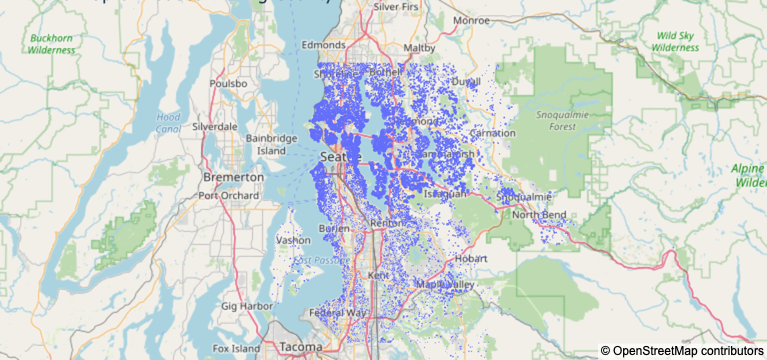

In [74]:
# house positions
fig = px.scatter_mapbox(df, lat="lat", lon="long", hover_name="id", hover_data=["price", "sqft_living"],
                        #color_discrete_sequence=["blue"],
                        #color = "price",
                        opacity = 0.8,
                        zoom=8, height=10,
                        size = 'price',
                        size_max = 5,
                        title="Geo Map of Houses in King County")
# background map
fig.update_layout(mapbox_style="open-street-map",)

fig.update_geos(fitbounds="locations")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

## Correlation

In [69]:
correlation_matrix = df[['price', 'sqft_living', 'sqft_lot']].corr()
correlation_matrix

price  sqft_living  sqft_lot
price        1.000        0.702     0.089
sqft_living  0.702        1.000     0.173
sqft_lot     0.089        0.173     1.000